In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import r2_score

import matplotlib.pyplot as plt

In [5]:
resultsDf = pd.read_csv("/home/yhbedoya/Repositories/SHM-MAE/TrafficEstimation/TrafficEstimationResultsEvaluationV3_checkpoint-180.pth.csv")
resultsDf.drop("index", axis=1, inplace=True)
resultsDf

,y_true,y_pred
0,1,1.123449
1,1,1.370370
2,1,1.118576
3,1,1.073478
4,1,1.238237
...,...,...
24153,2,2.071303
24154,2,1.280412
24155,1,1.129703
24156,2,1.831459


In [6]:
resultsDf["AE"] = np.abs(resultsDf["y_true"] - resultsDf["y_pred"])
resultsDf

,y_true,y_pred,AE
0,1,1.123449,0.123449
1,1,1.370370,0.370370
2,1,1.118576,0.118576
3,1,1.073478,0.073478
4,1,1.238237,0.238237
...,...,...,...
24153,2,2.071303,0.071303
24154,2,1.280412,0.719588
24155,1,1.129703,0.129703
24156,2,1.831459,0.168541


Text(0.5, 1.0, 'Absolute Error')

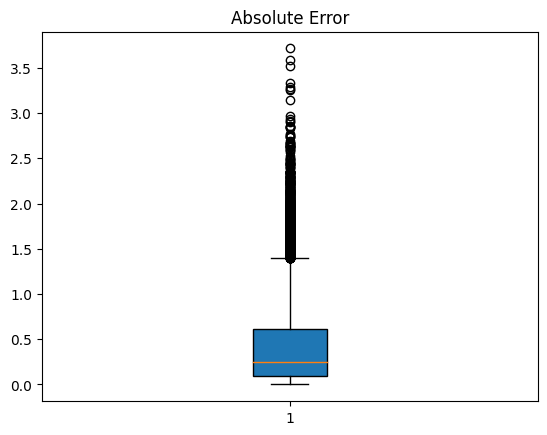

In [7]:
box1 = plt.boxplot(resultsDf["AE"], patch_artist=True)
plt.title("Absolute Error")

In [8]:
y_true = resultsDf["y_true"]
y_pred = resultsDf["y_pred"]

Text(0.5, 1.0, 'Real vs predicted values')

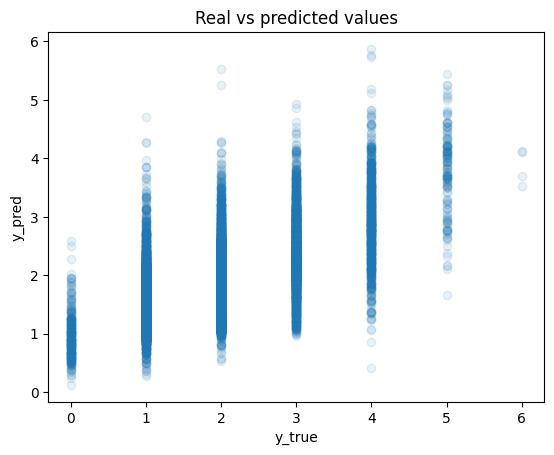

In [9]:
plt.scatter(y_true, y_pred, alpha=0.1)
plt.ylabel("y_pred")
plt.xlabel("y_true")
plt.title("Real vs predicted values")

In [10]:
r2_score(y_true, y_pred)

0.5314194931011947

In [11]:
MSE = ((np.array(y_true) - np.array(y_pred)) ** 2).mean()
MAE = (np.abs(np.array(y_true) - np.array(y_pred))).mean()
MSE, MAE

(0.351702111275267, 0.4089371081529928)

In [12]:
mae_percent = 100 * MAE / np.mean(y_true)
mae_percent

26.052485914451477